<a href="https://colab.research.google.com/github/jigneshraiyani/DeepLearning/blob/main/Feature_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [6]:
dataframe = pd.read_csv("/content/sample_data/Social_Network_Ads.csv")
dataframe.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
dataframe = dataframe.iloc[:,2:]
dataframe.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


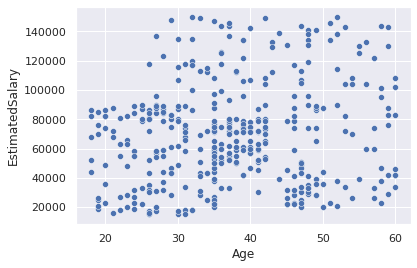

In [9]:
sns.scatterplot(dataframe.iloc[:,0], dataframe.iloc[:,1])
plt.show()

In [10]:
xdataframe = dataframe.iloc[:,0:2]
ydataframe = dataframe.iloc[:,-1]
ydataframe.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [11]:
#Split the data into train & test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(xdataframe, ydataframe, test_size=.2, random_state=21)


In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from keras import Sequential

In [13]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim =2))
model.add(Dense(1, activation ='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs = 100)

Epoch 1/100
10/10 [==============================] - 5s 25ms/step - loss: 1357.6936 - accuracy: 0.4594 - val_loss: 700.9512 - val_accuracy: 0.7000
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 598.3409 - accuracy: 0.5906 - val_loss: 451.9109 - val_accuracy: 0.3000
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 323.5405 - accuracy: 0.4469 - val_loss: 189.2186 - val_accuracy: 0.7000
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 162.6246 - accuracy: 0.4750 - val_loss: 104.4549 - val_accuracy: 0.7000
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 65.7796 - accuracy: 0.5281 - val_loss: 8.4564 - val_accuracy: 0.6875
Epoch 6/100
10/10 [==============================] - 0s 29ms/step - loss: 39.4183 - accuracy: 0.5000 - val_loss: 80.8042 - val_accuracy: 0.7000
Epoch 7/100
10/10 [==============================] - 0s 21ms/step - loss: 67.0897 - accuracy: 0.5344 - val_loss: 17.1001 - val_accur

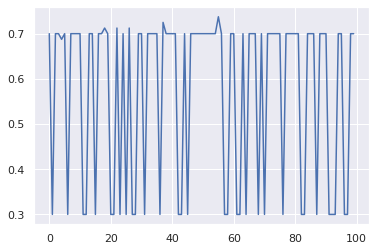

In [16]:
plt.plot(history.history['val_accuracy'])

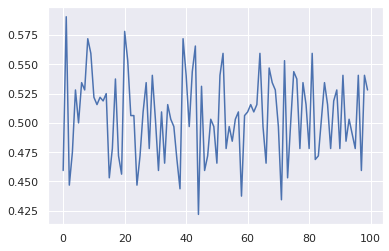

In [17]:
plt.plot(history.history['accuracy'])

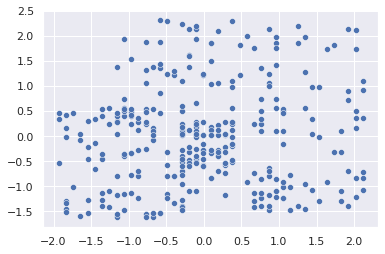

In [19]:
#Since the model accuracy is not good, performing Feature scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

sns.scatterplot(x_train_scaled[:, 0], x_train_scaled[:,1])
plt.show()

In [20]:
newmodel = Sequential()
newmodel.add(Dense(128, activation='relu', input_dim=2))
newmodel.add(Dense(1, activation='sigmoid'))
newmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               384       
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [24]:
newmodel.compile(optimizer = 'adam', loss='binary_crossentropy',metrics = ['accuracy'])
newmodelhistory = newmodel.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 22ms/step - loss: 0.2391 - accuracy: 0.9094 - val_loss: 0.2312 - val_accuracy: 0.9375
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.2367 - accuracy: 0.9094 - val_loss: 0.2314 - val_accuracy: 0.9375
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.2367 - accuracy: 0.9094 - val_loss: 0.2305 - val_accuracy: 0.9375
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.2366 - accuracy: 0.9094 - val_loss: 0.2310 - val_accuracy: 0.9375
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.2363 - accuracy: 0.9094 - val_loss: 0.2305 - val_accuracy: 0.9375
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2365 - accuracy: 0.9094 - val_loss: 0.2292 - val_accuracy: 0.9375
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2361 - accuracy: 0.9094 - val_loss: 0.2302 - val_accuracy: 0.9375
Epoch 8/100


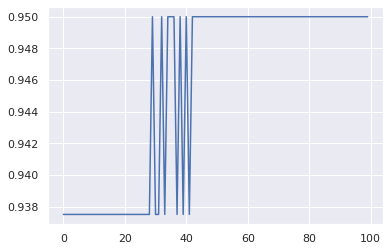

In [25]:
plt.plot(newmodelhistory.history['val_accuracy'])

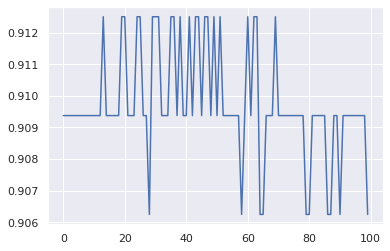

In [26]:
plt.plot(newmodelhistory.history['accuracy'])